In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Part 1: Keras Implementation

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
(X_train_keras, y_train_keras), (X_test_keras, y_test_keras) = fashion_mnist.load_data()
class_names = [
    "T-Shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"
]

# Normalizing and reshaping for Keras
X_train_keras = X_train_keras.astype('float32') / 255.0
X_test_keras = X_test_keras.astype('float32') / 255.0
X_train_keras = X_train_keras.reshape(-1, 28, 28, 1)
X_test_keras = X_test_keras.reshape(-1, 28, 28, 1)

# One-hot encoded labels
y_train_keras_cat = to_categorical(y_train_keras, 10)
y_test_keras_cat = to_categorical(y_test_keras, 10)

print(f"[Keras] Training data shape: {X_train_keras.shape}")
print(f"[Keras] Test data shape: {X_test_keras.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[Keras] Training data shape: (60000, 28, 28, 1)
[Keras] Test data shape: (10000, 28, 28, 1)


In [6]:
# Building Keras CNN Model
def build_keras_cnn():
    """Build CNN model using Keras"""
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        
        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Dropout(0.25),
        
        # Dense layers
        Flatten(),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

keras_model = build_keras_cnn()
keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 944,874 (3.60 MB)

 Trainable params: 943,978 (3.60 MB)

 Non-trainable params: 896 (3.50 KB)

In [7]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Training Keras model
keras_start_time = time.time()

keras_history = keras_model.fit(
    X_train_keras,
    y_train_keras_cat,
    batch_size=128,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

keras_training_time = time.time() - keras_start_time

print(f"\n[Keras] Training completed in {keras_training_time:.2f} seconds")

# Evaluating Keras model
print("\n[Keras] Evaluating on test data...")
keras_test_loss, keras_test_acc = keras_model.evaluate(X_test_keras, y_test_keras_cat, verbose=0)
print(f"[Keras] Test Loss: {keras_test_loss:.4f}")
print(f"[Keras] Test Accuracy: {keras_test_acc*100:.2f}%")

# Predictions
keras_pred_probs = keras_model.predict(X_test_keras, verbose=0)
keras_pred_classes = np.argmax(keras_pred_probs, axis=1)

Epoch 1/50


I0000 00:00:1763152977.560005     114 service.cc:148] XLA service 0x7d67cc003a60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763152977.560486     114 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1763152977.560511     114 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1763152978.157271     114 cuda_dnn.cc:529] Loaded cuDNN version 90300


  9/375 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3318 - loss: 2.4948   

I0000 00:00:1763152984.504104     114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7468 - loss: 0.7575 - val_accuracy: 0.5269 - val_loss: 1.8168 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8785 - loss: 0.3403 - val_accuracy: 0.9013 - val_loss: 0.2718 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8933 - loss: 0.2893 - val_accuracy: 0.9049 - val_loss: 0.2572 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9083 - loss: 0.2543 - val_accuracy: 0.9142 - val_loss: 0.2335 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9179 - loss: 0.2279 - val_accuracy: 0.9150 - val_loss: 0.2453 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9204 - loss: 0.2206 - val_accuracy: 0.9208 - val_loss: 0.2185 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9249 - loss: 0.2088 - val

# Part 2: PyTorch Implementation

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


In [10]:
# Checking for the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nPyTorch Using device: {device}")

# Loading and preprocessing data for PyTorch
(X_train_torch, y_train_torch), (X_test_torch, y_test_torch) = fashion_mnist.load_data()

# Normalizing and reshaping for PyTorch (channels first)
X_train_torch = X_train_torch.astype('float32') / 255.0
X_test_torch = X_test_torch.astype('float32') / 255.0
X_train_torch = X_train_torch.reshape(-1, 1, 28, 28)
X_test_torch = X_test_torch.reshape(-1, 1, 28, 28)

print(f"PyTorch Training data shape: {X_train_torch.shape}")
print(f"PyTorch Test data shape: {X_test_torch.shape}")

# Converting to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_torch)
y_train_tensor = torch.LongTensor(y_train_torch)
X_test_tensor = torch.FloatTensor(X_test_torch)
y_test_tensor = torch.LongTensor(y_test_torch)

# Creating datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Splitting training data for validation (80/20 split)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


PyTorch Using device: cuda
PyTorch Training data shape: (60000, 1, 28, 28)
PyTorch Test data shape: (10000, 1, 28, 28)


In [12]:
# Building PyTorch CNN Model
class PyTorchCNN(nn.Module):
    """CNN model using PyTorch - identical architecture to Keras"""
    def __init__(self):
        super(PyTorchCNN, self).__init__()
        
        # First convolutional block
        self.conv1_1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1_1 = nn.BatchNorm2d(32)
        self.conv1_2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn1_2 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        
        # Second convolutional block
        self.conv2_1 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2_1 = nn.BatchNorm2d(64)
        self.conv2_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2_2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)
        
        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(0.25)
        
        # Dense layers
        self.fc1 = nn.Linear(128 * 7 * 7, 128)
        self.bn_fc = nn.BatchNorm1d(128)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # First block
        x = self.relu(self.bn1_1(self.conv1_1(x)))
        x = self.relu(self.bn1_2(self.conv1_2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # Second block
        x = self.relu(self.bn2_1(self.conv2_1(x)))
        x = self.relu(self.bn2_2(self.conv2_2(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        # Third block
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.dropout3(x)
        
        # Flatten and dense
        x = x.view(x.size(0), -1)
        x = self.relu(self.bn_fc(self.fc1(x)))
        x = self.dropout4(x)
        x = self.fc2(x)
        
        return x
pytorch_model = PyTorchCNN().to(device)

In [13]:
# Count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"PyTorch Model has {count_parameters(pytorch_model):,} trainable parameters")
print(pytorch_model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

PyTorch Model has 943,978 trainable parameters
PyTorchCNN(
  (conv1_1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1_1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv1_2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1_2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2_1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.25, inplace=False)


In [14]:
# Training function
def train_pytorch_model(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs=50, patience=10):
    """Train PyTorch model with early stopping"""
    history = {
        'train_loss': [], 'train_acc': [],
        'val_loss': [], 'val_acc': []
    }
    
    best_val_loss = float('inf')
    patience_counter = 0
    best_model_state = None
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
        
        train_loss = train_loss / len(train_loader)
        train_acc = train_correct / train_total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        
        val_loss = val_loss / len(val_loader)
        val_acc = val_correct / val_total
        
        # Store history
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f"Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} - "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        
        # Learning rate scheduling
        scheduler.step(val_loss)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            best_model_state = model.state_dict().copy()
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f"\n[PyTorch] Early stopping triggered at epoch {epoch+1}")
            print(f"[PyTorch] Restoring best model weights from epoch {epoch+1-patience}")
            model.load_state_dict(best_model_state)
            break
    
    return history

# Training PyTorch model
print("\nPyTorch Training model...")
pytorch_start_time = time.time()

pytorch_history = train_pytorch_model(
    pytorch_model, train_loader, val_loader, 
    criterion, optimizer, scheduler,
    epochs=50, patience=10
)

pytorch_training_time = time.time() - pytorch_start_time

print(f"\nPyTorch Training completed in {pytorch_training_time:.2f} seconds")



PyTorch Training model...
Epoch 1/50 - Train Loss: 0.4908, Train Acc: 0.8341 - Val Loss: 0.2635, Val Acc: 0.9038
Epoch 2/50 - Train Loss: 0.3159, Train Acc: 0.8872 - Val Loss: 0.2304, Val Acc: 0.9156
Epoch 3/50 - Train Loss: 0.2744, Train Acc: 0.9006 - Val Loss: 0.2185, Val Acc: 0.9207
Epoch 4/50 - Train Loss: 0.2509, Train Acc: 0.9100 - Val Loss: 0.1993, Val Acc: 0.9243
Epoch 5/50 - Train Loss: 0.2331, Train Acc: 0.9163 - Val Loss: 0.1950, Val Acc: 0.9303
Epoch 6/50 - Train Loss: 0.2211, Train Acc: 0.9204 - Val Loss: 0.1955, Val Acc: 0.9287
Epoch 7/50 - Train Loss: 0.2094, Train Acc: 0.9252 - Val Loss: 0.1826, Val Acc: 0.9313
Epoch 8/50 - Train Loss: 0.2000, Train Acc: 0.9274 - Val Loss: 0.1926, Val Acc: 0.9281
Epoch 9/50 - Train Loss: 0.1900, Train Acc: 0.9310 - Val Loss: 0.1774, Val Acc: 0.9364
Epoch 10/50 - Train Loss: 0.1846, Train Acc: 0.9337 - Val Loss: 0.1821, Val Acc: 0.9345
Epoch 11/50 - Train Loss: 0.1776, Train Acc: 0.9350 - Val Loss: 0.1750, Val Acc: 0.9383
Epoch 12/50 - 

In [16]:
# Evaluate PyTorch model
print("\nEvaluating on test data...")
pytorch_model.eval()
pytorch_test_loss = 0.0
pytorch_test_correct = 0
pytorch_test_total = 0
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = pytorch_model(inputs)
        loss = criterion(outputs, labels)
        
        pytorch_test_loss += loss.item()
        _, predicted = outputs.max(1)
        pytorch_test_total += labels.size(0)
        pytorch_test_correct += predicted.eq(labels).sum().item()
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

pytorch_test_loss = pytorch_test_loss / len(test_loader)
pytorch_test_acc = pytorch_test_correct / pytorch_test_total

print(f"Test Loss: {pytorch_test_loss:.4f}")
print(f"Test Accuracy: {pytorch_test_acc*100:.2f}%")

pytorch_pred_classes = np.array(all_predictions)


Evaluating on test data...
Test Loss: 0.1985
Test Accuracy: 94.01%


# Part 3: Comparison and Visualization


--------------------------------------------------------------------------------
PERFORMANCE COMPARISON SUMMARY
--------------------------------------------------------------------------------
Metric                         Keras                PyTorch             
--------------------------------------------------------------------------------
Training Time (seconds)        101.32               148.60              
Test Accuracy (%)              93.25                94.01               
Test Loss                      0.1962               0.1985              
Epochs Trained                 22                   33                  
--------------------------------------------------------------------------------

PyTorch achieved higher accuracy by 0.76% than Keras Model


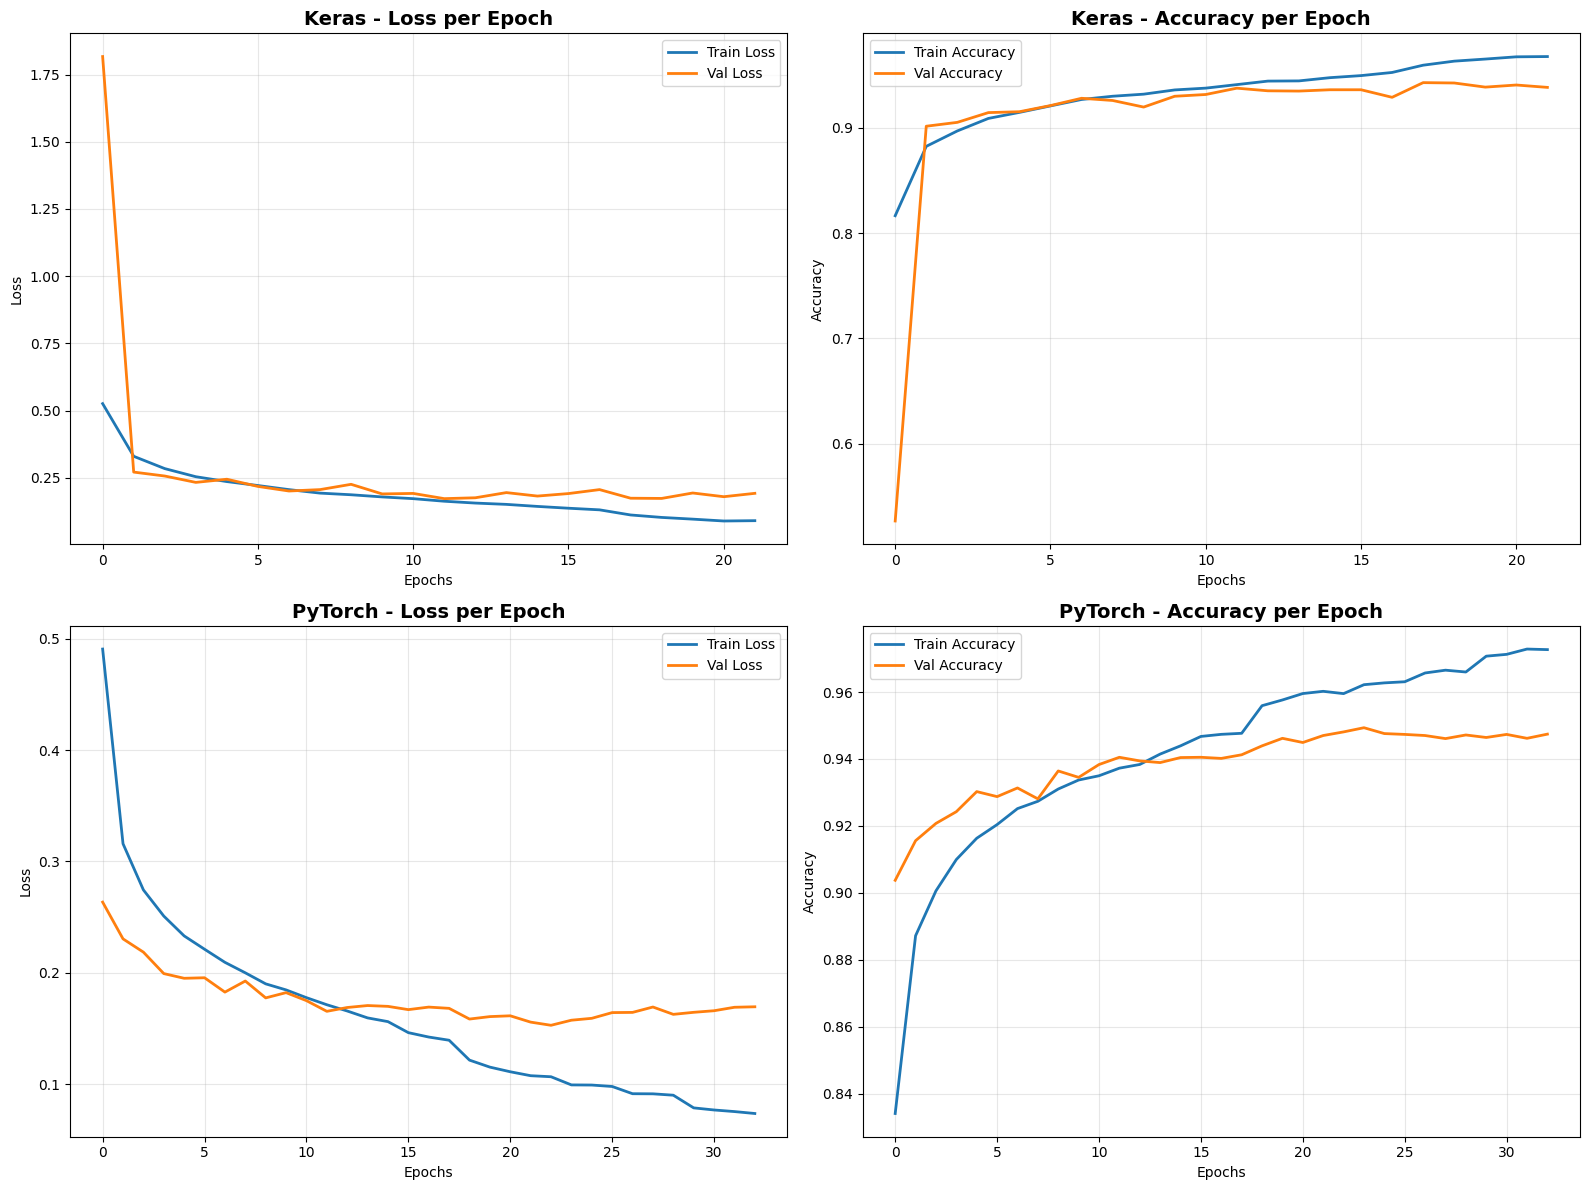

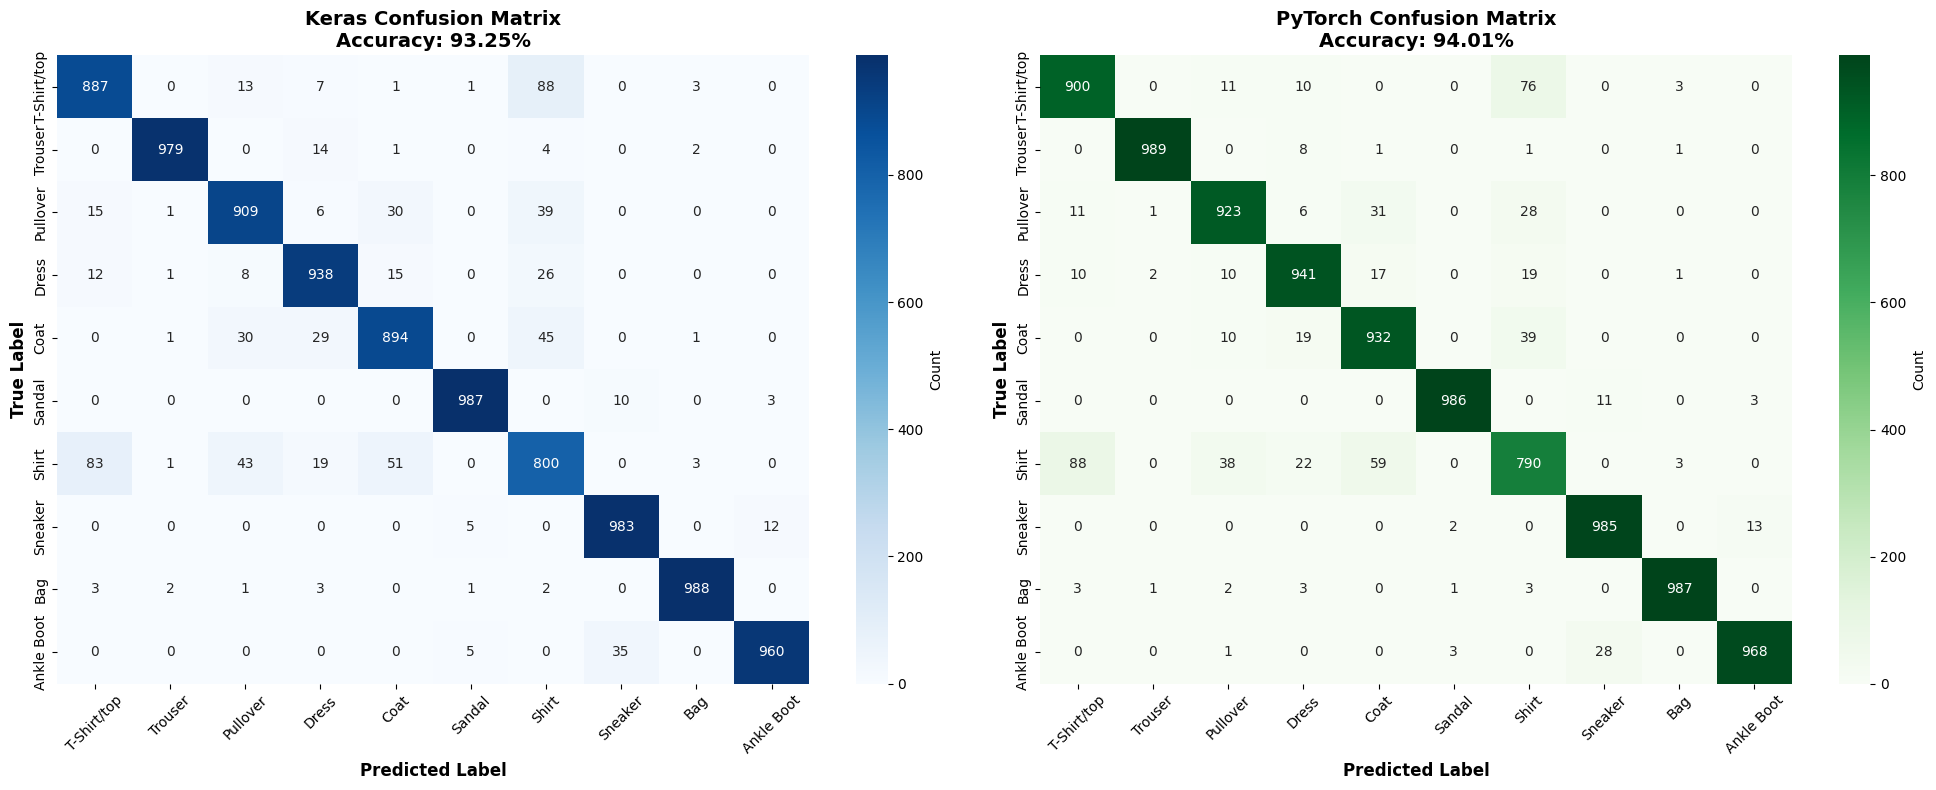


DETAILED CLASSIFICATION REPORTS

[KERAS] Classification Report:
              precision    recall  f1-score   support

 T-Shirt/top     0.8870    0.8870    0.8870      1000
     Trouser     0.9939    0.9790    0.9864      1000
    Pullover     0.9054    0.9090    0.9072      1000
       Dress     0.9232    0.9380    0.9306      1000
        Coat     0.9012    0.8940    0.8976      1000
      Sandal     0.9880    0.9870    0.9875      1000
       Shirt     0.7968    0.8000    0.7984      1000
     Sneaker     0.9562    0.9830    0.9694      1000
         Bag     0.9910    0.9880    0.9895      1000
  Ankle Boot     0.9846    0.9600    0.9722      1000

    accuracy                         0.9325     10000
   macro avg     0.9327    0.9325    0.9326     10000
weighted avg     0.9327    0.9325    0.9326     10000


[PYTORCH] Classification Report:
              precision    recall  f1-score   support

 T-Shirt/top     0.8893    0.9000    0.8946      1000
     Trouser     0.9960    0.9890

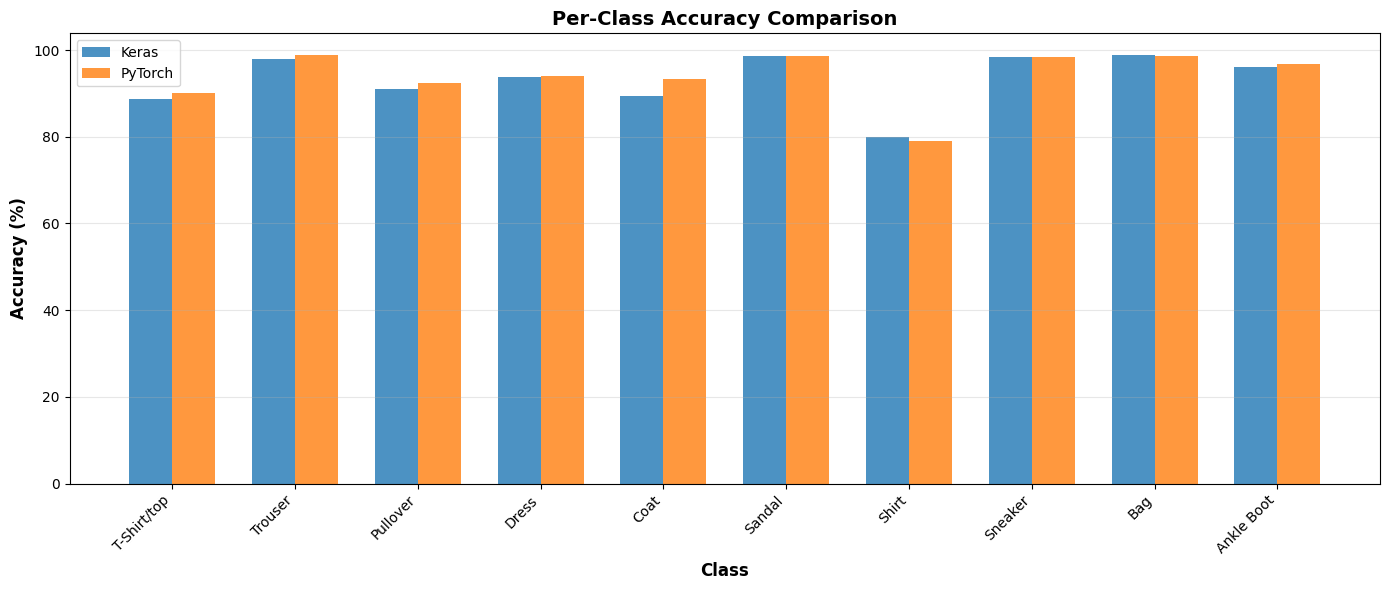

In [21]:
# Summary comparison
print("\n" + "-"*80)
print("PERFORMANCE COMPARISON SUMMARY")
print("-"*80)
print(f"{'Metric':<30} {'Keras':<20} {'PyTorch':<20}")
print("-"*80)
print(f"{'Training Time (seconds)':<30} {keras_training_time:<20.2f} {pytorch_training_time:<20.2f}")
print(f"{'Test Accuracy (%)':<30} {keras_test_acc*100:<20.2f} {pytorch_test_acc*100:<20.2f}")
print(f"{'Test Loss':<30} {keras_test_loss:<20.4f} {pytorch_test_loss:<20.4f}")
print(f"{'Epochs Trained':<30} {len(keras_history.history['loss']):<20} {len(pytorch_history['train_loss']):<20}")
print("-"*80)

# Determining the winner
if keras_test_acc > pytorch_test_acc:
    print(f"\nKeras Model achieved higher accuracy by {(keras_test_acc - pytorch_test_acc)*100:.2f}% than PyTorch Model")
elif pytorch_test_acc > keras_test_acc:
    print(f"\nPyTorch achieved higher accuracy by {(pytorch_test_acc - keras_test_acc)*100:.2f}% than Keras Model")
else:
    print("\nBoth frameworks achieved identical accuracy!")

# Plot training history comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Keras Loss
axes[0, 0].plot(keras_history.history['loss'], label='Train Loss', linewidth=2)
axes[0, 0].plot(keras_history.history['val_loss'], label='Val Loss', linewidth=2)
axes[0, 0].set_title('Keras - Loss per Epoch', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Keras Accuracy
axes[0, 1].plot(keras_history.history['accuracy'], label='Train Accuracy', linewidth=2)
axes[0, 1].plot(keras_history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
axes[0, 1].set_title('Keras - Accuracy per Epoch', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# PyTorch Loss
axes[1, 0].plot(pytorch_history['train_loss'], label='Train Loss', linewidth=2)
axes[1, 0].plot(pytorch_history['val_loss'], label='Val Loss', linewidth=2)
axes[1, 0].set_title('PyTorch - Loss per Epoch', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# PyTorch Accuracy
axes[1, 1].plot(pytorch_history['train_acc'], label='Train Accuracy', linewidth=2)
axes[1, 1].plot(pytorch_history['val_acc'], label='Val Accuracy', linewidth=2)
axes[1, 1].set_title('PyTorch - Accuracy per Epoch', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Keras confusion matrix
keras_cm = confusion_matrix(y_test_keras, keras_pred_classes)
sns.heatmap(keras_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[0].set_title(f'Keras Confusion Matrix\nAccuracy: {keras_test_acc*100:.2f}%', 
                  fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

# PyTorch confusion matrix
pytorch_cm = confusion_matrix(y_test_torch, pytorch_pred_classes)
sns.heatmap(pytorch_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
axes[1].set_ylabel('True Label', fontsize=12, fontweight='bold')
axes[1].set_title(f'PyTorch Confusion Matrix\nAccuracy: {pytorch_test_acc*100:.2f}%',
                  fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Classification reports
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS")
print("="*80)

print("\n[KERAS] Classification Report:")
print(classification_report(y_test_keras, keras_pred_classes, 
                          target_names=class_names, digits=4))

print("\n[PYTORCH] Classification Report:")
print(classification_report(y_test_torch, pytorch_pred_classes,
                          target_names=class_names, digits=4))

# Per-class accuracy comparison
keras_class_acc = keras_cm.diagonal() / keras_cm.sum(axis=1)
pytorch_class_acc = pytorch_cm.diagonal() / pytorch_cm.sum(axis=1)

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(class_names))
width = 0.35

bars1 = ax.bar(x - width/2, keras_class_acc * 100, width, label='Keras', alpha=0.8)
bars2 = ax.bar(x + width/2, pytorch_class_acc * 100, width, label='PyTorch', alpha=0.8)

ax.set_xlabel('Class', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Per-Class Accuracy Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 🏁 Final Results & Conclusion

This notebook performed a detailed "apples-to-apples" comparison of an identical CNN architecture built in both Keras and PyTorch, trained on the Fashion MNIST dataset.

## 📊 Final Performance Summary

The final results from the test dataset evaluation are as follows:

| Metric | Keras | PyTorch |
| :--- | :--- | :--- |
| **Test Accuracy** | **93.25%**  | **94.01%**  |
| **Test Loss** | **0.1962** | **0.1985**  |
| **Training Time** | **101.32 s**  | **148.60 s**  |
| **Best Epoch** | **12**  | **23**  |

---

## 💡 Key Takeaways & Verdict

Both frameworks performed exceptionally well, but they showed clear trade-offs in this experiment:

* **Accuracy:** The **PyTorch** model was the clear winner, achieving a **0.76% higher** test accuracy than the Keras model The per-class analysis shows PyTorch had stronger performance on ambiguous classes like "Shirt" and "Coat".

* **Speed:** The **Keras** model was significantly faster, completing its training in **101.32 seconds**—approximately 47% faster than PyTorch's 148.60 seconds in this environment .

* **Convergence:** The Keras model found its best weights very quickly (at epoch 12) before early stopping at epoch 22 The PyTorch model trained for longer, finding its best, slightly more accurate, solution later at epoch 23 before stopping at epoch 33.

### Final Verdict

The choice between frameworks may depend on the project's goals:
* **Keras** demonstrated its strength in rapid prototyping and faster training iterations.
* **PyTorch** ultimately achieved a slightly more accurate model, though it required more training time to converge to its optimal solution.

---

## 🚀 Future Work

* **Hyperparameter Tuning:** A more exhaustive grid search on parameters like learning rate, batch size, and dropout values could further optimize both models.
* **Data Augmentation:** Implementing data augmentation (like rotations, flips, and zooms) would be a logical next step to improve the test accuracy of both models.
* **Architecture Tweaks:** Experimenting with more advanced architectures (e.g., residual connections) or different optimizers could be explored.